In [1]:
#imports
import glob
import pickle
from tqdm.notebook import tqdm
import os
import subprocess
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#PATHs

USER = "leila" #change the user 
TRACER ="pbr28"
DATA_ROOT = "/autofs/space/simba_001/users/PBR28_KOALA/data/PET"
WORKING_PROCESSED_DATA_PATH = f"/autofs/space/celer_001/users/{USER}/working_{TRACER}"
WINDOWS_SHARED_DATA_PATH =  f"/autofs/space/celer_001/users/{USER}/{TRACER}"
PICKLE_SAVE_PATH = f"{WORKING_PROCESSED_DATA_PATH}/pickles"


In [3]:
# PARAMS
RECONSTRUCTION_ALGORITHM = "OP"
PATIENT_ID = "PBRKOA_HC021_01"
nifty_files = glob.glob(f"{WINDOWS_SHARED_DATA_PATH}/*{PATIENT_ID}*/*.nii")
nifty_files

['/autofs/space/celer_001/users/leila/pbr28/PBRKOA_HC021_01/first-3-min-low-count.nii']

## Low Count First 3 Minutes

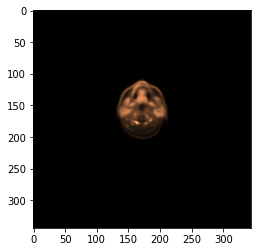

In [6]:
slice = 35

def transform_low_count(file_path):
    img = nb.load(file_path).get_fdata()
    img = img.squeeze()
    img = np.rot90(img)
    img = np.flip(img, 2)
    img = np.flip(img, 0)
    return img 

plt.title("First three min list mode")
plt.imshow(transform_low_count(nifty_files[0])[:, :, slice], cmap="copper")
plt.show()

# Ground Truth

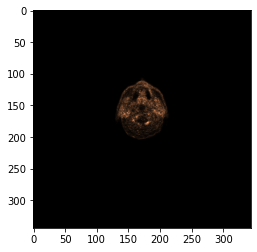

In [7]:
ground_truth_niftys = glob.glob(f"{DATA_ROOT}/{PATIENT_ID}/PET/PET_60-90_SUV.nii.gz")
img = nb.load(ground_truth_niftys[0]).get_fdata()
img = img.squeeze()
img = np.rot90(img)
plt.title("Full list mode data")
plt.imshow(img[:,:,slice], cmap="copper")
plt.show()